# Predicting whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:
   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

Applying several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10) such as:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* Neural network using Keras.


Start by importing the mammographic_masses.data.txt file into a Pandas dataframe.

In [1]:
import pandas as pd
dataframe = pd.read_csv('mammographic_masses.data.txt', header = 0)
dataframe.head()
#dataframe.info()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [2]:
column_names = ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']
df = pd.read_csv('mammographic_masses.data.txt', names = column_names, na_values = '?')
df.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI_RADS   959 non-null    float64
 1   age       956 non-null    float64
 2   shape     930 non-null    float64
 3   margin    913 non-null    float64
 4   density   885 non-null    float64
 5   severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [4]:
df.corr()

,BI_RADS,age,shape,margin,density,severity
BI_RADS,1.000000,0.094754,0.186055,0.163086,0.038729,0.231601
age,0.094754,1.000000,0.364077,0.411355,0.028954,0.432066
shape,0.186055,0.364077,1.000000,0.742211,0.078666,0.563308
margin,0.163086,0.411355,0.742211,1.000000,0.109392,0.574919
density,0.038729,0.028954,0.078666,0.109392,1.000000,0.064010
severity,0.231601,0.432066,0.563308,0.574919,0.064010,1.000000


In [5]:
df = df.dropna()
df.head()
df.describe()

,BI_RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Converting the Pandas dataframes into numpy arrays that can be used by scikit_learn.

In [6]:
import numpy as np
feature_names = ['age', 'shape', 'margin', 'density']
feature_data = np.array(df[feature_names])
classes = np.array(df[['severity']])
#print(feature_data)
#print(classes)

Normalizing the input data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feature_data = scaler.fit_transform(feature_data)
print(scaled_feature_data)

[[ 0.7650629   0.17563638  1.39618483  0.24046607]
 [ 0.15127063  0.98104077  1.39618483  0.24046607]
 [-1.89470363 -1.43517241 -1.157718    0.24046607]
 ...
 [ 0.56046548  0.98104077  1.39618483  0.24046607]
 [ 0.69686376  0.98104077  1.39618483  0.24046607]
 [ 0.42406719  0.17563638  0.11923341  0.24046607]]


## Decision Trees


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, classes, test_size = 0.25, random_state = 123)

In [9]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Display the resulting decision tree.

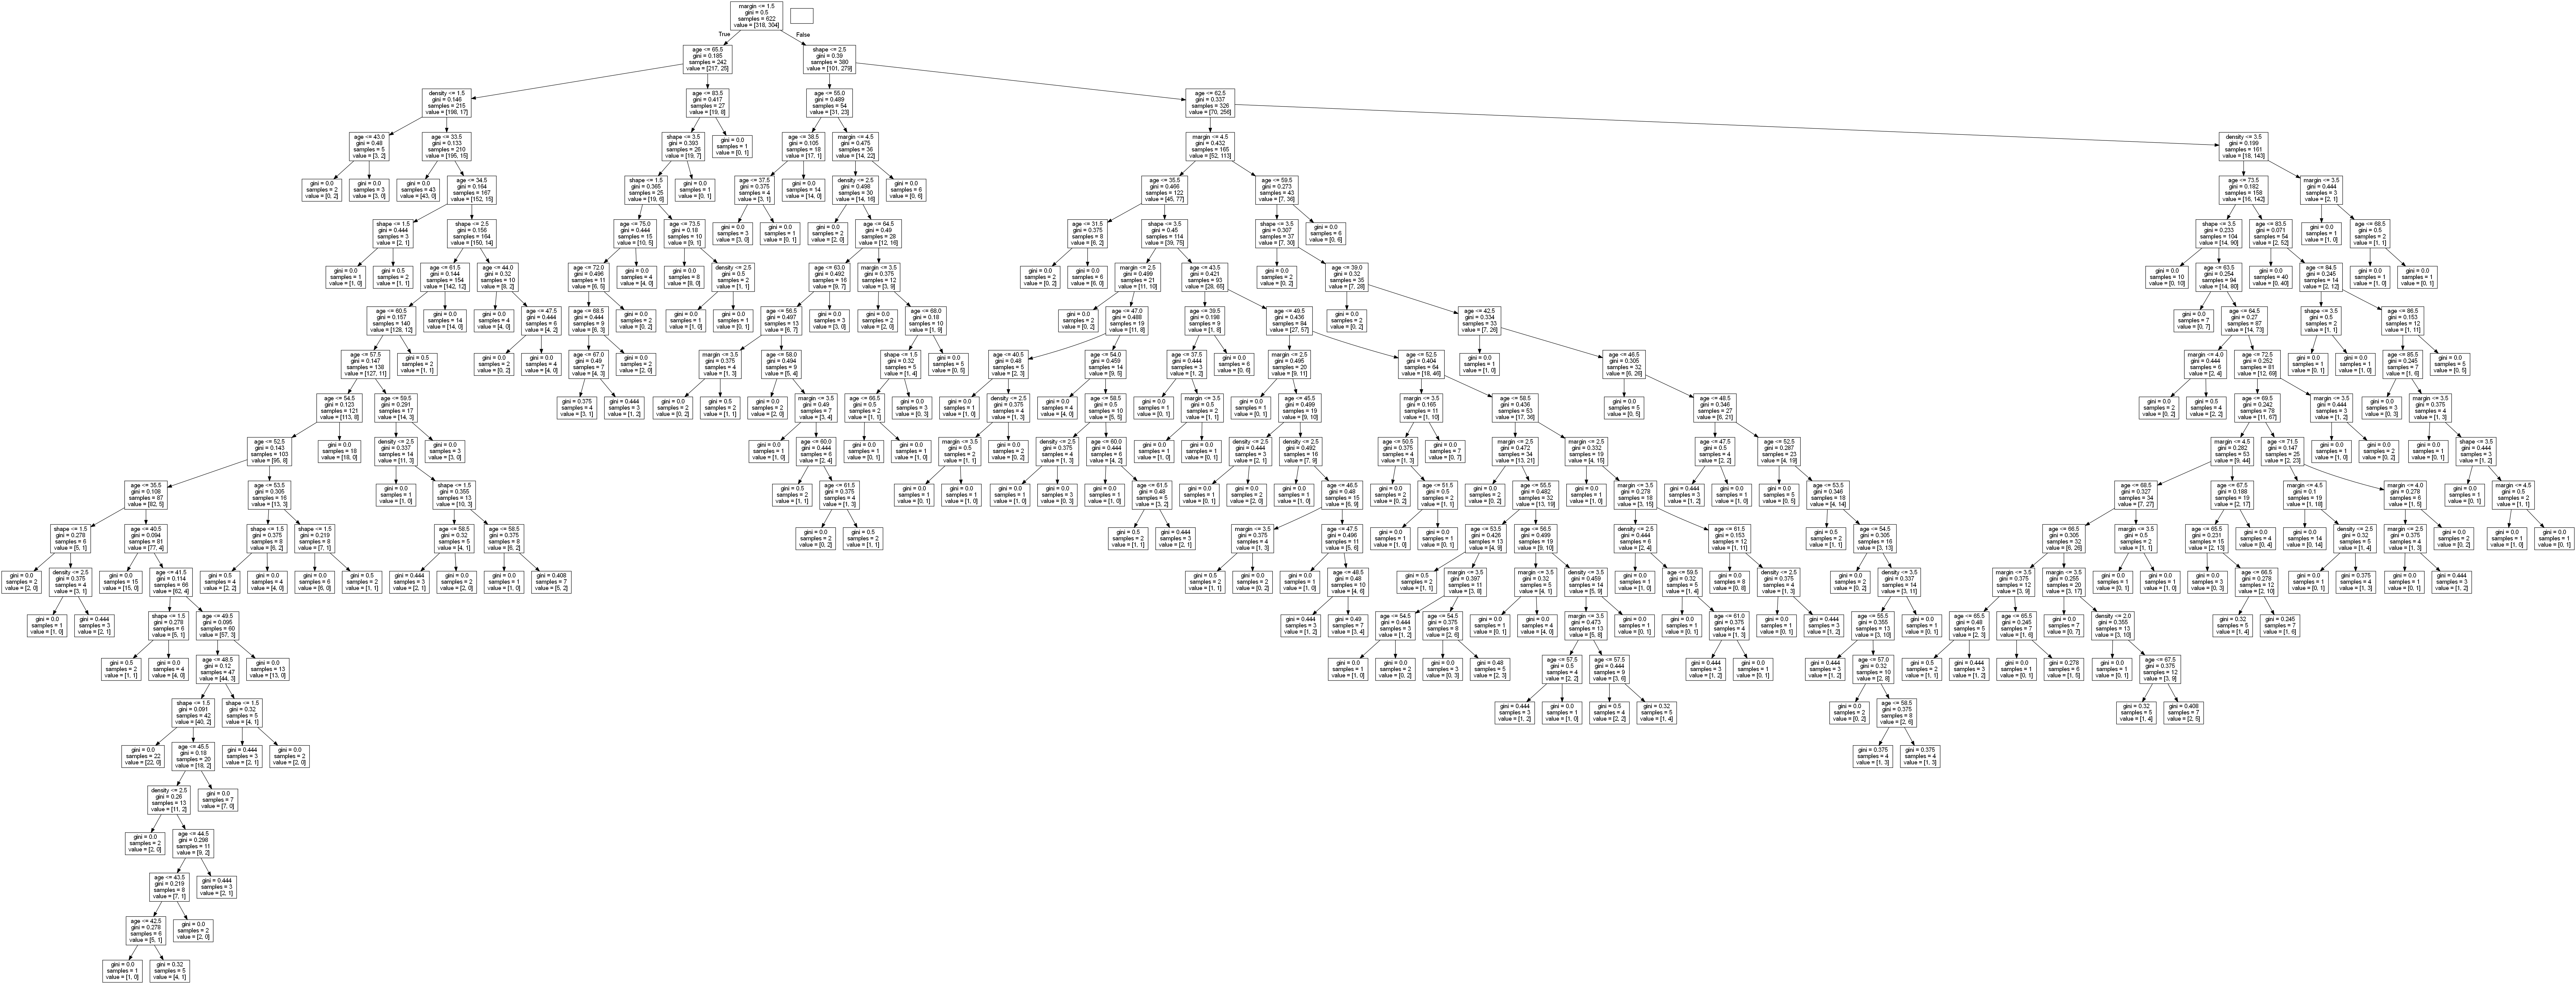

In [10]:
from IPython.display import Image
from six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Measuring the accuracy:

In [11]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

0.7692307692307693


Using K-Fold cross validation to get a better measure of model's accuracy (K=10).

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, scaled_feature_data, classes, cv = 12)
print(scores)
print(scores.mean())

[0.7        0.78571429 0.7826087  0.73913043 0.75362319 0.7826087
 0.71014493 0.71014493 0.72463768 0.79710145 0.7826087  0.73913043]
0.7506211180124224


### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10)
scores = cross_val_score(model, scaled_feature_data, classes.ravel(), cv = 10)
print(scores)
print(scores.mean())

[0.73493976 0.77108434 0.73493976 0.78313253 0.85542169 0.69879518
 0.71084337 0.75903614 0.80722892 0.6746988 ]
0.7530120481927712


## SVM

In [14]:
from sklearn import svm
svc = svm.SVC( kernel = 'linear', C = 1.0).fit(feature_data, classes.ravel())

In [15]:
scores = cross_val_score(svc, feature_data, classes.ravel(), cv = 10)
print(scores)
print(scores.mean())

[0.71084337 0.79518072 0.84337349 0.80722892 0.84337349 0.73493976
 0.79518072 0.81927711 0.87951807 0.75903614]
0.7987951807228917


## KNN
K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [16]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier(n_neighbors = 10)
scores = cross_val_score(model, scaled_feature_data, classes.ravel(), cv = 10)
print(scores.mean())

0.7927710843373494


Writing a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference.

In [24]:
for n in range(1, 51):
    model = neighbors.KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(model, scaled_feature_data, classes.ravel(), cv = 10)
    print(n, scores.mean())
    

1 0.7228915662650601
2 0.6855421686746987
3 0.7530120481927711
4 0.7385542168674699
5 0.7783132530120482
6 0.7650602409638554
7 0.7975903614457832
8 0.7819277108433734
9 0.7927710843373493
10 0.7927710843373494
11 0.7951807228915662
12 0.7843373493975905
13 0.7843373493975904
14 0.7855421686746988
15 0.7855421686746988
16 0.7831325301204819
17 0.7867469879518072
18 0.7783132530120482
19 0.7855421686746988
20 0.7843373493975904
21 0.7867469879518072
22 0.783132530120482
23 0.7795180722891566
24 0.7771084337349399
25 0.7855421686746988
26 0.7831325301204819
27 0.7843373493975904
28 0.7843373493975904
29 0.7867469879518072
30 0.7843373493975904
31 0.7867469879518072
32 0.789156626506024
33 0.7867469879518072
34 0.789156626506024
35 0.7843373493975904
36 0.7867469879518072
37 0.7831325301204819
38 0.7867469879518072
39 0.7819277108433734
40 0.7843373493975904
41 0.7819277108433734
42 0.7831325301204819
43 0.7831325301204819
44 0.7843373493975904
45 0.7831325301204819
46 0.7831325301204819


## Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train.ravel())
predicted = model.predict(X_test)
accuracy = accuracy_score(y_test.ravel(), predicted)
print(accuracy)

0.7259615384615384


## Revisiting SVM using different kernels.

In [19]:
svc = svm.SVC( kernel = 'rbf', C = 1.0).fit(feature_data, classes.ravel())
scores = cross_val_score(svc, feature_data, classes.ravel(), cv = 10)
print(scores)
print(scores.mean())

[0.69879518 0.78313253 0.79518072 0.77108434 0.79518072 0.73493976
 0.75903614 0.8313253  0.79518072 0.78313253]
0.7746987951807228


In [20]:
svc = svm.SVC( kernel = 'sigmoid', C = 1.0).fit(feature_data, classes.ravel())
scores = cross_val_score(svc, feature_data, classes.ravel(), cv = 10)
print(scores)
print(scores.mean())

[0.37349398 0.26506024 0.27710843 0.30120482 0.31325301 0.3373494
 0.3253012  0.26506024 0.31325301 0.62650602]
0.33975903614457825


In [21]:
svc = svm.SVC( kernel = 'poly', C = 1.0, degree = 5).fit(feature_data, classes.ravel())
scores = cross_val_score(svc, feature_data, classes.ravel(), cv = 5)
print(scores)
print(scores.mean())

[0.77108434 0.78915663 0.77710843 0.79518072 0.75903614]
0.7783132530120482


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train.ravel())
predicted = model.predict(X_test)
accuracy = accuracy_score(y_test.ravel(), predicted)
print(accuracy)

0.7740384615384616


## Neural Networks

Let's see if an artificial neural network can do even better.

In [26]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim = 4, kernel_initializer = 'normal', activation = 'relu'))
    #model.add(Dense(4, kernel_initializer = 'normal', activation = 'relu'))
    #output layer with binary classification
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [29]:
from scikeras.wrappers import KerasClassifier

estimator = KerasClassifier(model = create_model, epochs = 100, verbose = 0)

scores = cross_val_score(estimator, feature_data, classes, cv = 10)
print(scores.mean())

0.7879518072289157


Considering the above results we can conclude that using KNN where K value is 10 or using SVM with a linear kernel and regularization paramater to be 1.0 we can achieve accuracy of around 80%.